## ML BCSE209L SMS SPAM CLASSIFICATION PROJECT

**Names of all participants: **


1.   Zeel Mehta 21BAI1533 
2.   Sneha Yaduka 21BAI1382
3.   Diya Basu 21BAI1926


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/zeelmehta/Desktop/SMSSpamCollection.csv', names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

In [7]:
df['length']=df['message'].apply(len)
df.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
df.length.describe()

count    5572.00000
mean       80.47649
std        59.93356
min         2.00000
25%        36.00000
50%        62.00000
75%       122.00000
max       910.00000
Name: length, dtype: float64

<AxesSubplot:xlabel='length', ylabel='Count'>

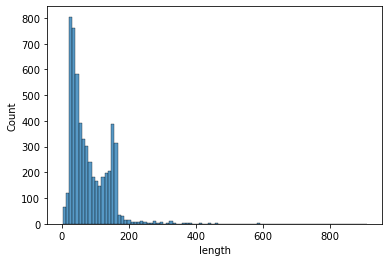

In [9]:
sns.histplot(data=df,x='length')

In [10]:
df.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.473368  58.435881   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.629183  28.856451  13.0  133.0  149.0  157.0  223.0

<AxesSubplot:xlabel='length', ylabel='Count'>

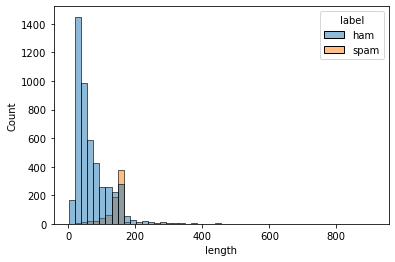

In [11]:
sns.histplot(data=df, x='length', hue='label', bins=50)

In [12]:
m4 = df['message'][3]
print(m4)

U dun say so early hor... U c already then say...


In [13]:
import string

In [14]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
bowt = CountVectorizer(analyzer=text_process).fit(df['message'])
print(len(bowt.vocabulary_))

11425


In [18]:
bow4 = bowt.transform([m4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [19]:
bowtransform = CountVectorizer(analyzer=text_process).fit(df['message'])
print(len(bowt.vocabulary_))

11425


In [20]:
mbow=bowtransform.transform(df['message'])

In [21]:
print('Shape of Sparse Matrix: ', mbow.shape)
print('Amount of Non-Zero occurences: ', mbow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [22]:
from sklearn.feature_extraction.text import TfidfTransformer

In [23]:
tfidft = TfidfTransformer().fit(mbow)
tfidf4 = tfidft.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [24]:
mtfidf = tfidft.transform(mbow)
print(mtfidf.shape)

(5572, 11425)


In [25]:
from sklearn.naive_bayes import MultinomialNB
det = MultinomialNB().fit(mtfidf, df['label'])

In [26]:
print('predicted:', det.predict(tfidf4)[0])
print('expected:', df.label[3])

predicted: ham
expected: ham


In [27]:
pred = det.predict(mtfidf)
print(pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [28]:
from sklearn.metrics import classification_report
print (classification_report(df['label'], pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [29]:
from sklearn.model_selection import train_test_split

In [30]:
msg_train, msg_test, label_train, label_test = \
train_test_split(df['message'], df['label'], test_size=0.2)

In [31]:
print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [32]:
from sklearn.pipeline import Pipeline

In [33]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),
])

In [34]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x1642b7790>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [35]:
pred = pipeline.predict(msg_test)

In [36]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       997
        spam       0.79      1.00      0.88       118

    accuracy                           0.97      1115
   macro avg       0.89      0.98      0.93      1115
weighted avg       0.98      0.97      0.97      1115



CHECKING FINAL OUTPUT WITH THE CLASSIFIER

In [46]:
t=["hello this is input string"]

In [47]:
prediction=pipeline.predict(t)

In [50]:
print(classification_report(prediction,t))

                            precision    recall  f1-score   support

                       ham       0.00      0.00      0.00       1.0
hello this is input string       0.00      0.00      0.00       0.0

                  accuracy                           0.00       1.0
                 macro avg       0.00      0.00      0.00       1.0
              weighted avg       0.00      0.00      0.00       1.0



/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zeelmeht